### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ  
### Факультет искусственного интеллекта  
### Дисциплина: Инструменты обработки и визуализации данных  
## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 4 
#### Студент:  Князев Арсений
#### Группа:   ЗФИбд-01-24  
#### Hepatitis Data Set 

1. Считайте из заданного набора данных репозитария UCI значения трех признаков и метки класса.

2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените пропущенные значения средними значениями классов. 

3. Определите минимальное и максимальное значения третьего признака, разбейте диапазон изменения значений третьего признака на 10 равных поддиапазонов. Визуализируйте набор данных в виде диаграммы рассеяния на плоскости с координатами, соответствующими двум первым признакам, отображая точки различных классов разными цветами и с маркерами переменных размеров в зависимости от индекса поддиапазона третьего признака. Подпишите оси и рисунок, создайте две легенды набора данных (для классов и поддиапазонов третьего признака).

4. Визуализируйте эмпирические функции распределения (Cdata) трех независимых признаков в виде трех рисунков, расположенных горизонтально, используя разные цвета и типы линий. Подпишите каждый из трех рисунков и его оси.

5. Определите два признака (из трех), имеющих наиболее высокую корреляцию, и визуализируйте набор данных в виде маржинальной гистограммы с осями, соответствующими двум найденным признакам. Отобразите точки различных классов разными цветами и создайте легенду. При помощи аннотаций укажите на визуализации точки данных, в которых достигаются минимальные и максимальные значения признаков. 

In [1]:
#!unzip hepatitis.zip

Archive:  hepatitis.zip
  inflating: Index                   
   creating: /Users/arsknz/osnov/code/viz_mark_pfur/lab_4/costs
  inflating: costs/Index             
  inflating: costs/hepatitis.README  
  inflating: costs/hepatitis.cost    
  inflating: costs/hepatitis.delay   
  inflating: costs/hepatitis.expense  
  inflating: costs/hepatitis.group   
  inflating: hepatitis.data          
  inflating: hepatitis.names         


### Lib imports
___

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

### Some preparations
____

In [5]:
data = pd.read_csv("hepatitis.data", index_col=False, header=None)

In [6]:
data.sample(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
124,2,50,1,2,2,2,2,2,2,1,1,1,2,2,1.00,85,75,4.0,72,2
95,2,40,1,1,1,1,1,1,1,1,2,2,2,2,0.60,40,69,4.2,67,2
105,2,25,1,2,2,2,2,2,2,2,2,2,2,2,0.60,?,34,6.4,?,2
145,2,31,1,1,2,1,2,2,2,2,2,2,2,2,1.20,75,173,4.2,54,2


In [7]:
data = data[[15, 17, 18, 19]]
data.sample(5)

,15,17,18,19
63,164,3.1,41,1
24,45,4.3,70,1
117,139,3.9,62,2
57,52,3.9,52,1
40,75,4.0,21,1


In [ ]:
data.rename(
    columns={15: "ALK PHOSPHATE ", 17: "ALBUMIN", 18: "PROTIME", 19: "HISTOLOGY"},
    inplace=True,
)
data.sample(5)

,ALK PHOSPHATE,ALBUMIN,PROTIME,HISTOLOGY
129,82,3.3,30,2
144,?,2.4,?,2
125,70,4.1,100,2
3,46,4.0,80,1
114,141,3.3,?,2


### Task 2
____

In [ ]:
data = data.replace("?", np.nan)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ALK PHOSPHATE   126 non-null    object
 1   ALBUMIN         139 non-null    object
 2   PROTIME         88 non-null     object
 3   HISTOLOGY       155 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 5.0+ KB


In [ ]:
for col in data.columns:
    if data[col].dtype == "object":
        data[col] = pd.to_numeric(data[col])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ALK PHOSPHATE   126 non-null    float64
 1   ALBUMIN         139 non-null    float64
 2   PROTIME         88 non-null     float64
 3   HISTOLOGY       155 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 5.0 KB


In [ ]:
data.HISTOLOGY.isna().sum()

(np.int64(0), 155)

In [ ]:
for col in data.columns:
    if col != "HISTOLOGY":
        data[col] = data[col].fillna(data[col].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ALK PHOSPHATE   155 non-null    float64
 1   ALBUMIN         155 non-null    float64
 2   PROTIME         155 non-null    float64
 3   HISTOLOGY       155 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 5.0 KB


### Task 3
____

In [ ]:
data.columns = data.columns.str.strip().str.upper().str.replace(" ", "_")

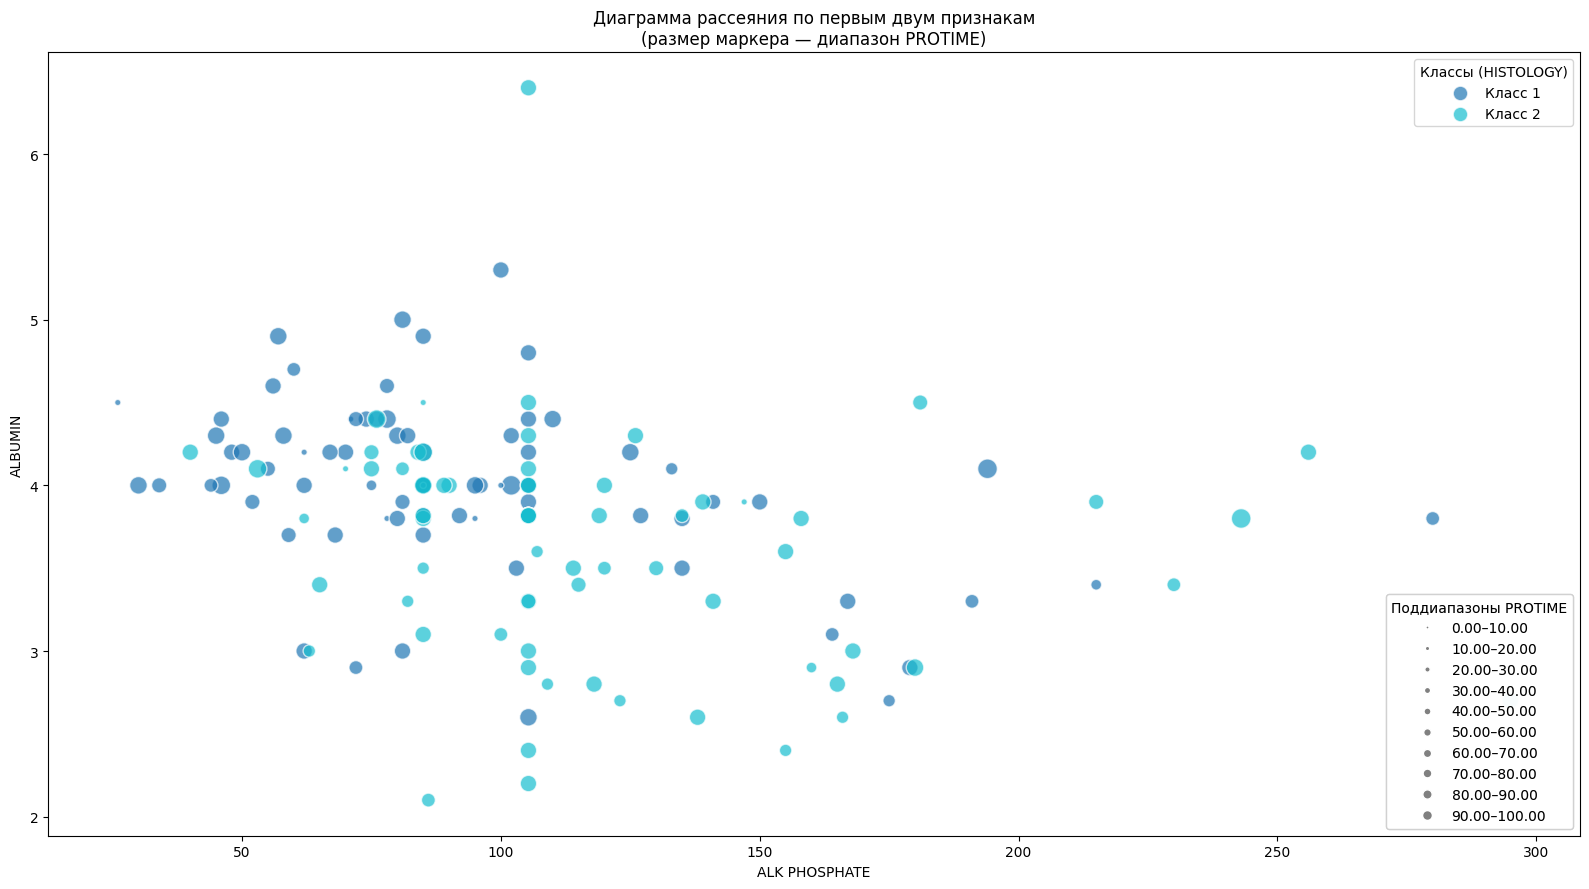

In [ ]:
third_feature = "PROTIME"
min_val = data[third_feature].min()
max_val = data[third_feature].max()

bins = np.linspace(min_val, max_val, 11)
data["PROTIME_BIN"] = np.digitize(data[third_feature], bins) - 1

classes = data["HISTOLOGY"].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(classes)))

# 4️⃣ Размеры маркеров в зависимости от поддиапазона (0–9 → 20–200)
sizes = np.linspace(20, 200, 10)
data["marker_size"] = data["PROTIME_BIN"].map(lambda i: sizes[i] if 0 <= i < 10 else 20)

# 5️⃣ Диаграмма рассеяния
fig, ax = plt.subplots(figsize=(16, 9))

for i, cls in enumerate(classes):
    subset = data[data["HISTOLOGY"] == cls]
    ax.scatter(
        subset["ALK_PHOSPHATE"],
        subset["ALBUMIN"],
        s=subset["marker_size"],
        c=[colors[i]],
        label=f"Класс {cls}",
        alpha=0.7,
        edgecolors="w",
    )

# 6️⃣ Первая легенда — классы
legend1 = ax.legend(title="Классы (HISTOLOGY)", loc="upper right")
ax.add_artist(legend1)

# 7️⃣ Вторая легенда — поддиапазоны третьего признака
handles = [
    Line2D(
        [],
        [],
        marker="o",
        color="w",
        markerfacecolor="gray",
        markersize=np.sqrt(sizes[i]) / 2,
        label=f"{bins[i]:.2f}–{bins[i + 1]:.2f}",
    )
    for i in range(10)
]
legend2 = ax.legend(handles=handles, title="Поддиапазоны PROTIME", loc="lower right")
ax.add_artist(legend2)

# 8️⃣ Подписи и оформление
ax.set_xlabel("ALK PHOSPHATE")
ax.set_ylabel("ALBUMIN")
ax.set_title(
    "Диаграмма рассеяния по первым двум признакам\n(размер маркера — диапазон PROTIME)"
)

plt.tight_layout()
plt.show()

### Task 4
___

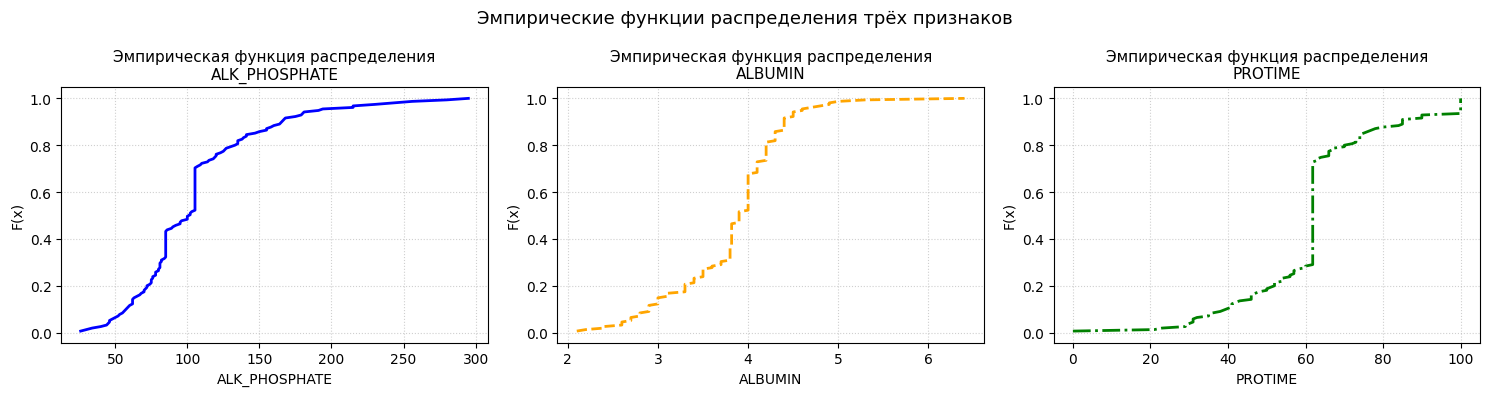

In [ ]:
features = ["ALK_PHOSPHATE", "ALBUMIN", "PROTIME"]

colors = ["blue", "orange", "green"]
linestyles = ["-", "--", "-."]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, feature in enumerate(features):
    x = np.sort(data[feature])
    y = np.arange(1, len(x) + 1) / len(x)

    axes[i].plot(x, y, color=colors[i], linestyle=linestyles[i], linewidth=2)
    axes[i].set_title(f"Эмпирическая функция распределения\n{feature}", fontsize=11)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("F(x)")
    axes[i].grid(True, linestyle=":", alpha=0.6)

fig.suptitle("Эмпирические функции распределения трёх признаков", fontsize=13)
plt.tight_layout()
plt.show()

### Task 5
___

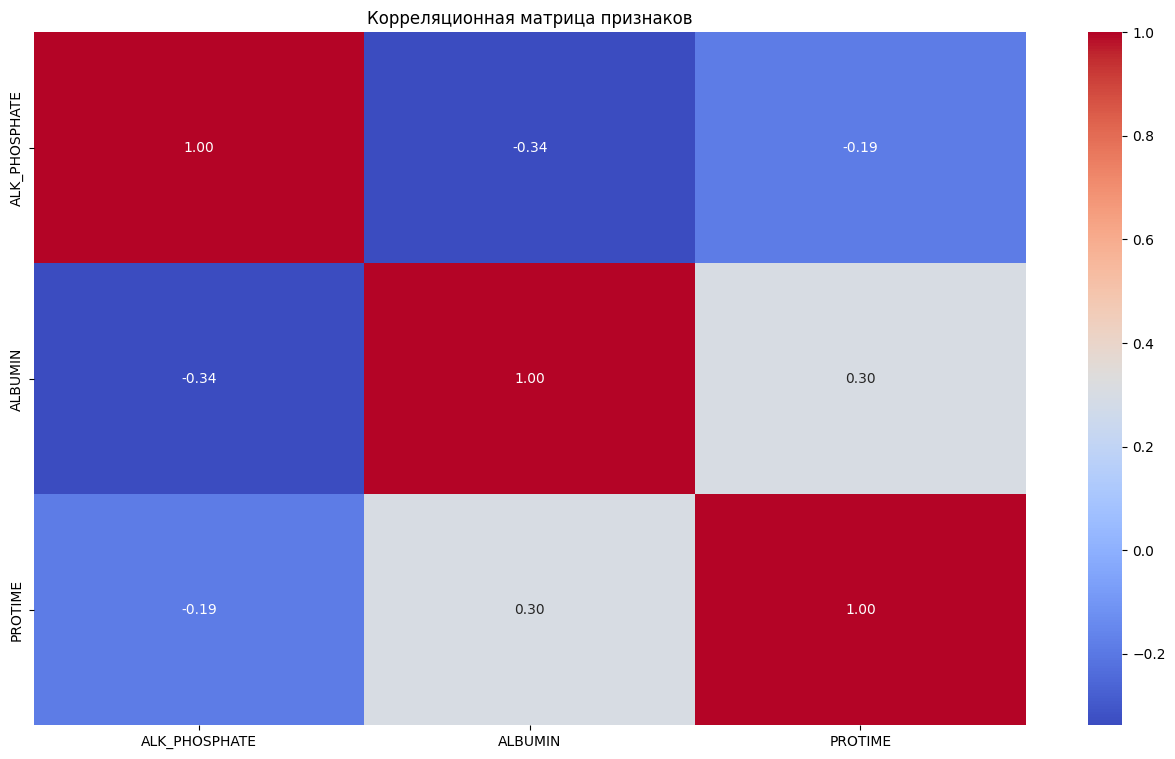

In [ ]:
plt.figure(figsize=(16, 9))
sns.heatmap(data[features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица признаков")
plt.show()

/var/folders/g7/1pnn3np5387b0n86j69n94v40000gn/T/ipykernel_72205/2796131126.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


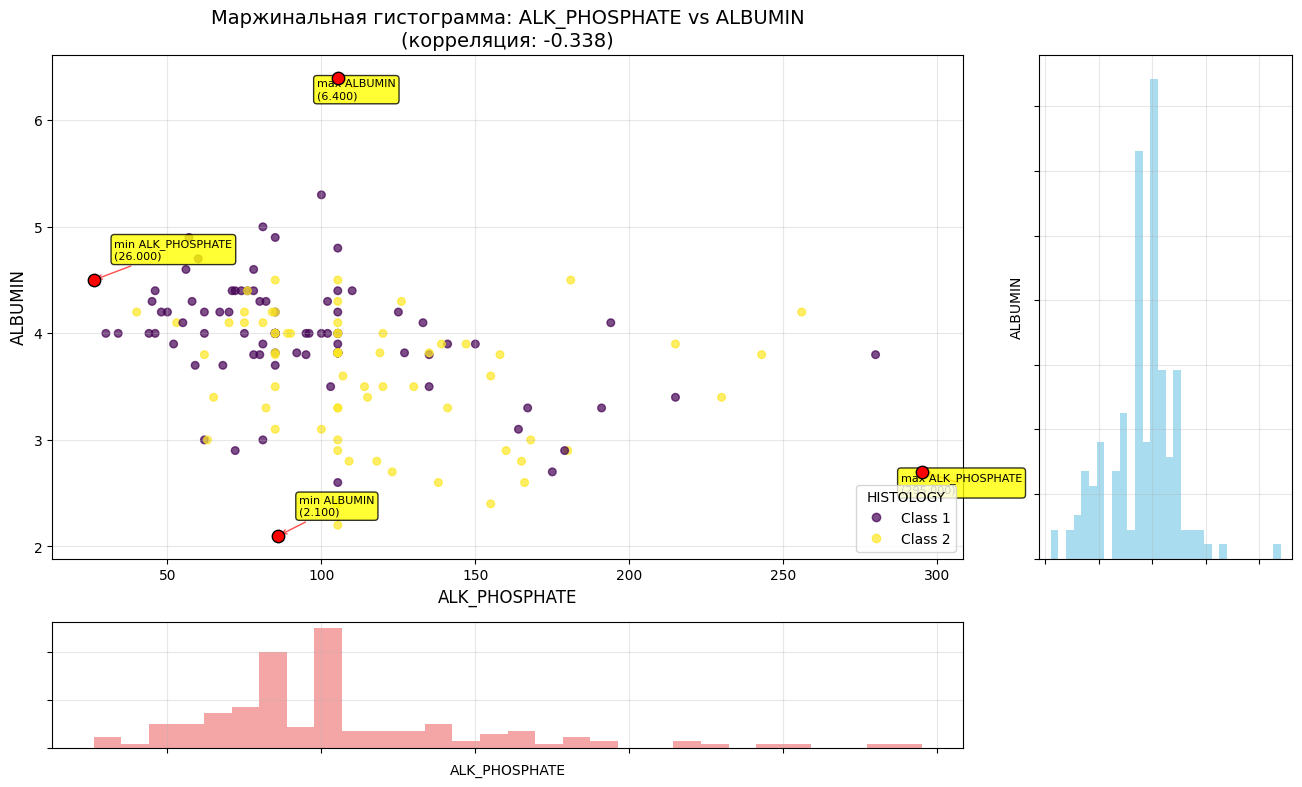

In [ ]:
correlation_matrix = data[["ALK_PHOSPHATE", "ALBUMIN", "PROTIME"]].corr()

corr_values = correlation_matrix.values.copy()
np.fill_diagonal(corr_values, 0)
max_corr_idx = np.unravel_index(np.argmax(np.abs(corr_values)), corr_values.shape)
feature1 = correlation_matrix.columns[max_corr_idx[0]]
feature2 = correlation_matrix.columns[max_corr_idx[1]]
max_corr = correlation_matrix.iloc[max_corr_idx]

fig = plt.figure(figsize=(16, 9))
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.3)

ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

scatter = ax_main.scatter(
    data[feature1],
    data[feature2],
    c=data["HISTOLOGY"].astype("category").cat.codes,
    cmap="viridis",
    alpha=0.7,
    s=30,
)

ax_main.set_xlabel(feature1, fontsize=12)
ax_main.set_ylabel(feature2, fontsize=12)
ax_main.set_title(
    f"Маржинальная гистограмма: {feature1} vs {feature2}\n(корреляция: {max_corr:.3f})",
    fontsize=14,
)
ax_main.grid(True, alpha=0.3)

ax_right.hist(
    data[feature2].dropna(),
    bins=30,
    orientation="vertical",
    color="skyblue",
    alpha=0.7,
    density=True,
)
ax_right.set_ylabel(feature2)
ax_right.grid(True, alpha=0.3)

ax_bottom.hist(
    data[feature1].dropna(), bins=30, color="lightcoral", alpha=0.7, density=True
)
ax_bottom.set_xlabel(feature1)
ax_bottom.grid(True, alpha=0.3)

extreme_points = []

min_feature1_idx = data[feature1].idxmin()
max_feature1_idx = data[feature1].idxmax()
extreme_points.extend(
    [
        (
            min_feature1_idx,
            f"min {feature1}\n({data.loc[min_feature1_idx, feature1]:.3f})",
        ),
        (
            max_feature1_idx,
            f"max {feature1}\n({data.loc[max_feature1_idx, feature1]:.3f})",
        ),
    ]
)

min_feature2_idx = data[feature2].idxmin()
max_feature2_idx = data[feature2].idxmax()
extreme_points.extend(
    [
        (
            min_feature2_idx,
            f"min {feature2}\n({data.loc[min_feature2_idx, feature2]:.3f})",
        ),
        (
            max_feature2_idx,
            f"max {feature2}\n({data.loc[max_feature2_idx, feature2]:.3f})",
        ),
    ]
)

for idx, label in extreme_points:
    x_val = data.loc[idx, feature1]
    y_val = data.loc[idx, feature2]
    offset_x = 15 if "min" in label else -15
    offset_y = 15 if "min" in label else -15
    ax_main.scatter(x_val, y_val, color="red", s=80, edgecolor="k", zorder=5)
    ax_main.annotate(
        label,
        xy=(x_val, y_val),
        xytext=(offset_x, offset_y),
        textcoords="offset points",
        fontsize=8,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.8),
        arrowprops=dict(arrowstyle="->", color="red", alpha=0.7),
    )

class_labels = [f"Class {cls}" for cls in sorted(data["HISTOLOGY"].unique())]
ax_main.legend(
    handles=scatter.legend_elements()[0],
    labels=class_labels,
    title="HISTOLOGY",
    loc="lower right",
)

plt.tight_layout()
plt.show()
